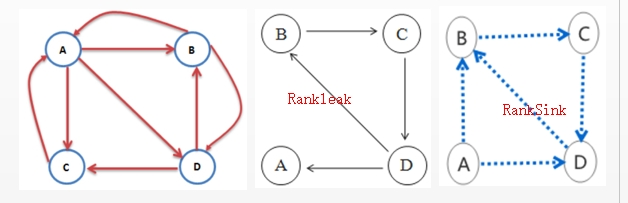

In [1]:
from IPython.display import Image
Image(filename='pagerank.jpg',width=500,height=200)

In [2]:
import numpy as np

#转移矩阵
m = np.array([[0,1/2,1,0],
             [1/3,0,0,1/2],
             [1/3,0,0,1/2],
             [1/3,1/2,0,0]])
#初始化向量
w = np.array([1/4,1/4,1/4,1/4])

#迭代
def work(m,w):
    for i in range(10):
        w = np.dot(m,w)  #矩阵乘法
        print(w)
        
work(m,w)

[0.375      0.20833333 0.20833333 0.20833333]
[0.3125     0.22916667 0.22916667 0.22916667]
[0.34375 0.21875 0.21875 0.21875]
[0.328125   0.22395833 0.22395833 0.22395833]
[0.3359375  0.22135417 0.22135417 0.22135417]
[0.33203125 0.22265625 0.22265625 0.22265625]
[0.33398438 0.22200521 0.22200521 0.22200521]
[0.33300781 0.22233073 0.22233073 0.22233073]
[0.33349609 0.22216797 0.22216797 0.22216797]
[0.33325195 0.22224935 0.22224935 0.22224935]


In [3]:
m_leak = np.array([[0,0,0,1/2],
                  [0,0,0,1/2],
                  [0,1,0,0],
                  [0,0,1,0]])
def random_work(m_leak,w,n):
    d = 0.85 #阻尼因子为0.85
    for i in range(10):
        w = 1-d/n+d*np.dot(m_leak,w) # n为项目数
        print(w)
        
random_work(m_leak,w,4)

[0.89375 0.89375 1.      1.     ]
[1.2125    1.2125    1.5471875 1.6375   ]
[1.4834375  1.4834375  1.818125   2.10260937]
[1.68110898 1.68110898 2.04842187 2.33290625]
[1.77898516 1.77898516 2.21644264 2.52865859]
[1.8621799  1.8621799  2.29963738 2.67147624]
[1.9228774  1.9228774  2.37035292 2.74219178]
[1.9529315  1.9529315  2.42194579 2.80229998]
[1.97847749 1.97847749 2.44749178 2.84615392]
[1.99711542 1.99711542 2.46920587 2.86786801]


简化版的PR值为: {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}
随机模型的PR值: {'A': 0.3245609358176831, 'B': 0.22514635472743894, 'C': 0.22514635472743894, 'D': 0.22514635472743894}


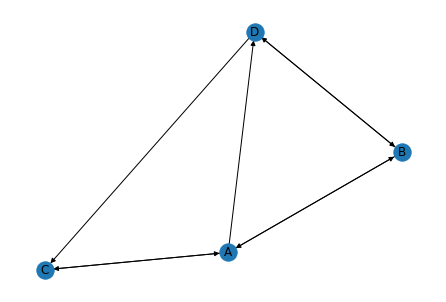

In [23]:
# networkx工具实现
import networkx as nx
import matplotlib.pyplot as plt
#创建有向图
G = nx.DiGraph()
# 设置有向图的边集合
edges = [('A','B'),('A','C'),('A','D'),('B','A'),('B','D'),('C','A'),('D','B'),('D','C')]
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0],edge[1])

# 有向图可视化
# 可视化布局,中心放射状
layout = nx.spring_layout(G)
nx.draw(G,pos=layout,with_labels=True,hold=False)
plt.draw()

#计算简化版PR值
pr = nx.pagerank(G,alpha=1)
print('简化版的PR值为:',pr)

#计算随机模型PR值
pr = nx.pagerank(G,alpha=0.85)
print('随机模型的PR值:',pr)